The first experiment here will be to replicate run 0 conducted in wind_cnn.ipynb and will be used to validate the new classes and functions created in wind_cnn.py which will be a standalone script. 


WindFaultCNN(
  (conv1): Conv1d(19, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=160, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1, Loss: 1.232396750434025
Epoch 2, Loss: 0.9389334699592075
Epoch 3, Loss: 0.911376271698926
Epoch 4, Loss: 0.916735968074283
Epoch 5, Loss: 0.910180823625745
Epoch 6, Loss: 0.90509359820469
Epoch 7, Loss: 0.9049516416884757
Epoch 8, Loss: 0.9049186074250454
Epoch 9, Loss: 0.9048976660580248
Epoch 10, Loss: 0.9048839328256814
Training complete.
Test Loss: 1.5257
Test Accuracy: 0.3796

Classification Report:
               precision    recall  f1-score   support

           0     0.9441    1.0000    0.9713       862
           1     1.0000    0.7213    0.8381       183
          

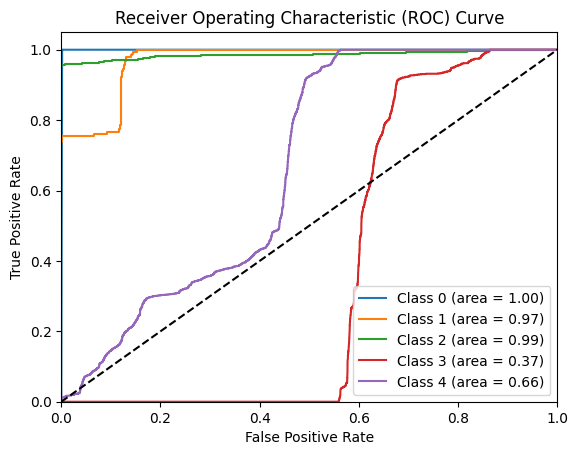

(0.37960715073935114,
 '              precision    recall  f1-score   support\n\n           0     0.9441    1.0000    0.9713       862\n           1     1.0000    0.7213    0.8381       183\n           2     0.9991    0.9512    0.9745      1107\n           3     0.1602    0.9176    0.2728      1128\n           4     0.7103    0.0619    0.1139      5782\n\n    accuracy                         0.3796      9062\n   macro avg     0.7628    0.7304    0.6341      9062\nweighted avg     0.7052    0.3796    0.3350      9062\n',
 array([[ 862,    0,    0,    0,    0],
        [  51,  132,    0,    0,    0],
        [   0,    0, 1053,    0,   54],
        [   0,    0,    1, 1035,   92],
        [   0,    0,    0, 5424,  358]]),
 {0: np.float64(0.9991463414634146),
  1: np.float64(0.970086598389889),
  2: np.float64(0.9856282828489296),
  3: np.float64(0.37400481052012435),
  4: np.float64(0.6629501195889683)})

In [1]:
import os
from wind_cnn import WindFaultDataset, WindFaultCNN, train_model, evaluate_model
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

### Hyperparameters
WINDOW_SIZE = 20
OVERLAP_SIZE = 15
LR = 0.001
NUM_CLASSES = 5
BATCH_SIZE = 5
NUM_FEATURES = 19
CRITERION = torch.nn.CrossEntropyLoss()
LABEL_MAPPING = {
    "3P": 4,  # 3-phase to ground
    "2P": 3,   # 2-phase line to line
    "2P.EARTH": 2, # 2-phase to earth
    "1P": 1,    # 1-pole line to ground
    "normal": 0  # Normal
}

training_data = 'Dataset1'
test_data = 'Distribution_faults'
train_paths = []
test_paths = []
for file in os.listdir(training_data):
    train_paths.append(os.path.join(training_data, file))
for file in os.listdir(test_data):
    test_paths.append(os.path.join(test_data, file))

train_set = WindFaultDataset(train_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
test_set = WindFaultDataset(test_paths, LABEL_MAPPING, WINDOW_SIZE, OVERLAP_SIZE)
train_dataloader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_set, BATCH_SIZE, shuffle=False)

model02 = WindFaultCNN(NUM_FEATURES, NUM_CLASSES, WINDOW_SIZE)
print(model02)
train_model(model02, train_dataloader, 10, LR)
evaluate_model(model02, test_dataloader, CRITERION, NUM_CLASSES)


Goals for experiment 1:

Improve Label Mapping: Train test split with balanced classes from same directory. 
